In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
df=pd.read_csv("monthly_milk_production.csv",index_col='Date',parse_dates=True)

In [11]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

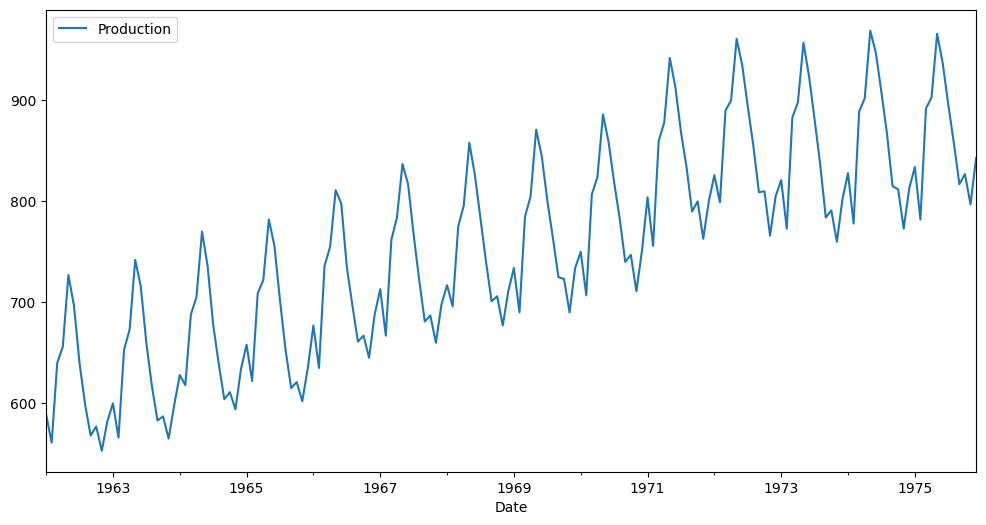

In [12]:
df.plot(figsize=(12,6))

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
df.index.freq='MS'

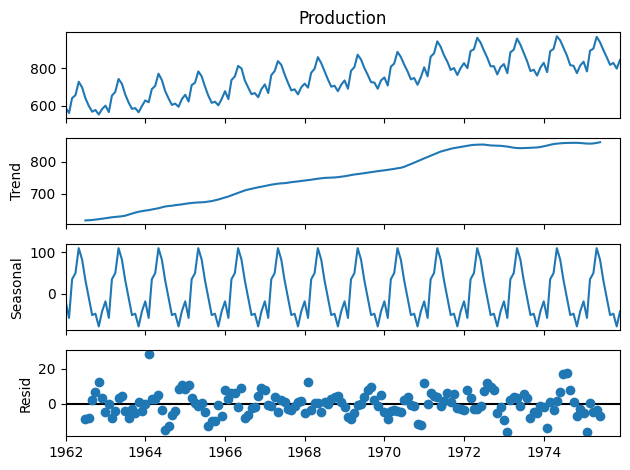

In [15]:
results=seasonal_decompose(df['Production'])
results.plot();

In [16]:
len(df)

168

In [17]:
train=df.iloc[:156]

In [18]:
test=df.iloc[156:]

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [21]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [22]:
scaler.fit(train)
scaled_train=scaler.transform(train)

In [23]:
scaled_test=scaler.transform(test)

In [24]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [30]:
# from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [32]:
n_inputs=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)

In [36]:
X,y=generator[0]
print(X.flatten())
print(y)

[0.08653846 0.01923077 0.20913462]
[[0.24759615]]


In [37]:
X.shape

(1, 3, 1)

In [38]:
n_inputs=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)